In [1]:
#### 1.loading_data.R 
### 1)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res

# Oncogenic Signaling Pathways in The Cancer
All_pathway_level <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Oncogenic_Signaling_Pathways_in_The_Cancer/All__Oncogenic_Signaling_Alteration_pathway_level.rds")
### 1)Merge table
Plot.df.Alt.pathway <- dplyr::left_join(Cluster.df, All_pathway_level, by = "rownames")


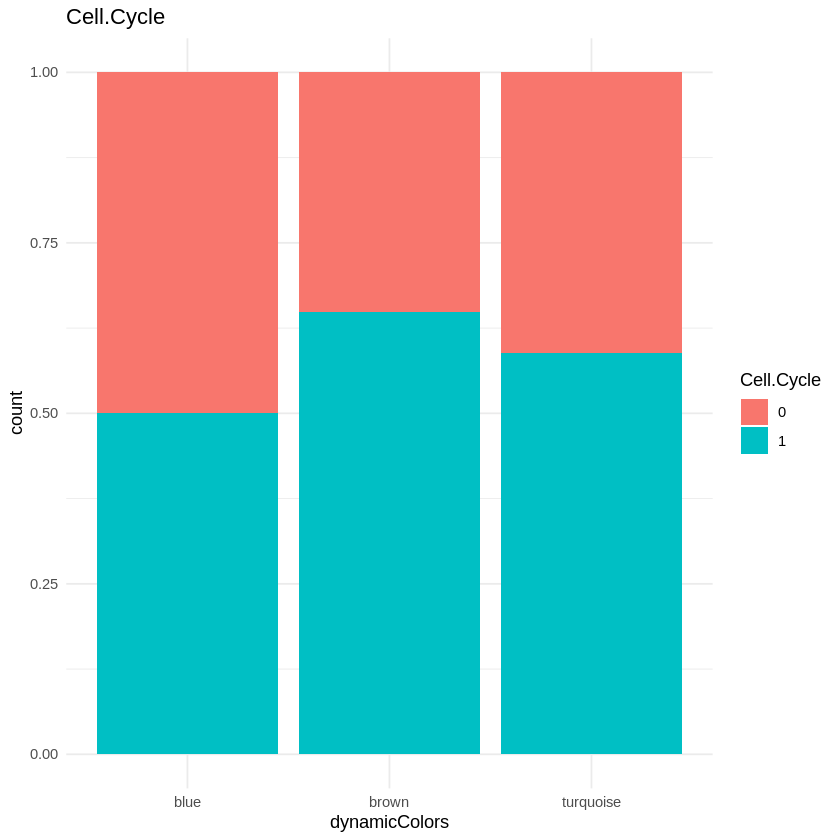

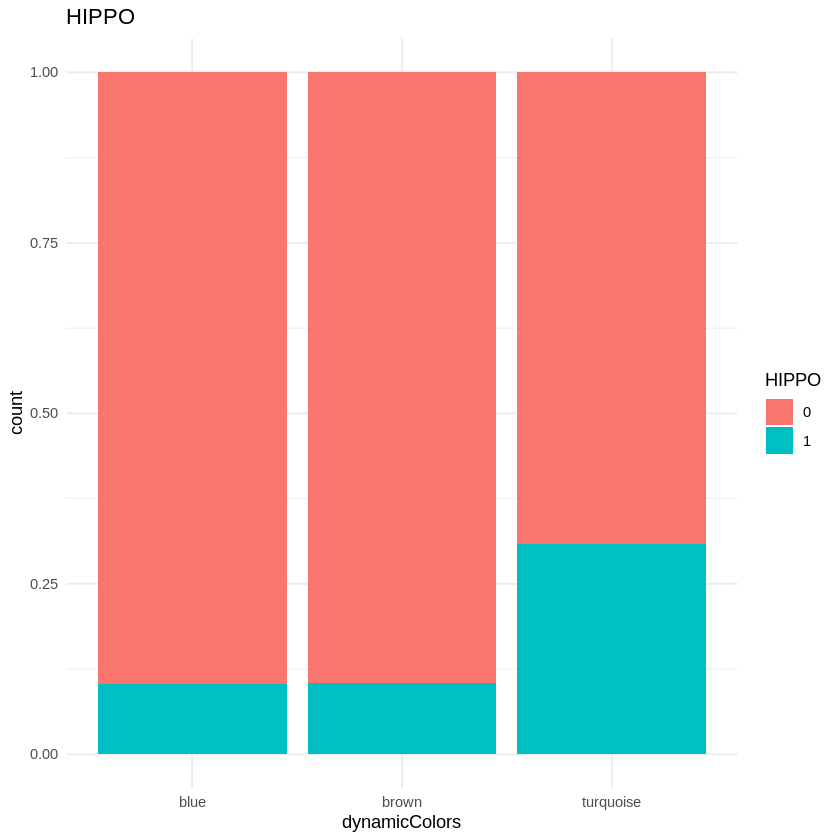

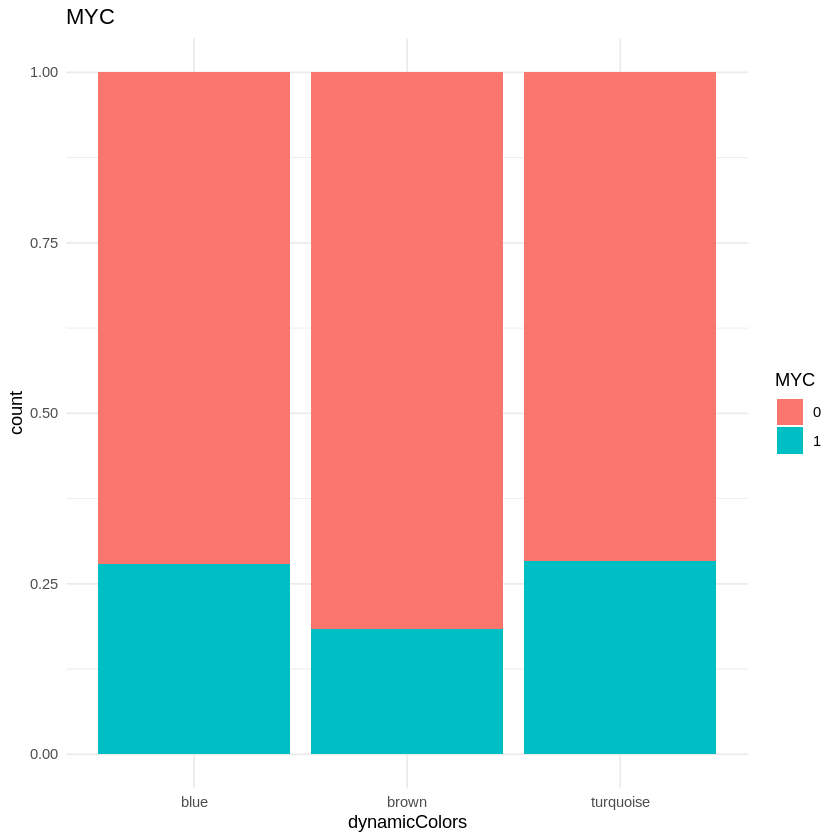

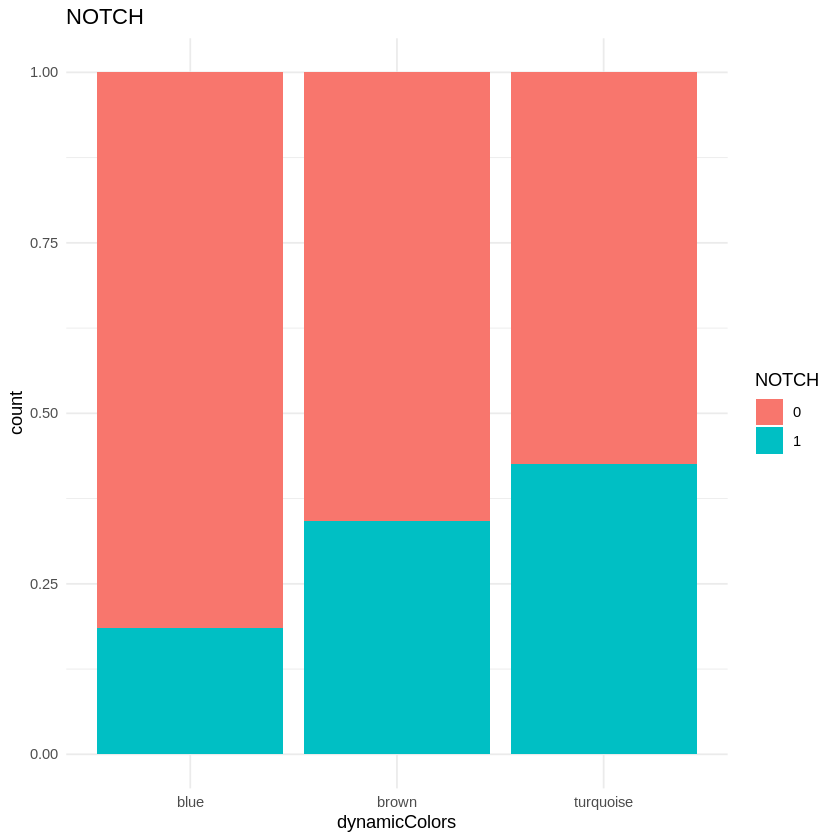

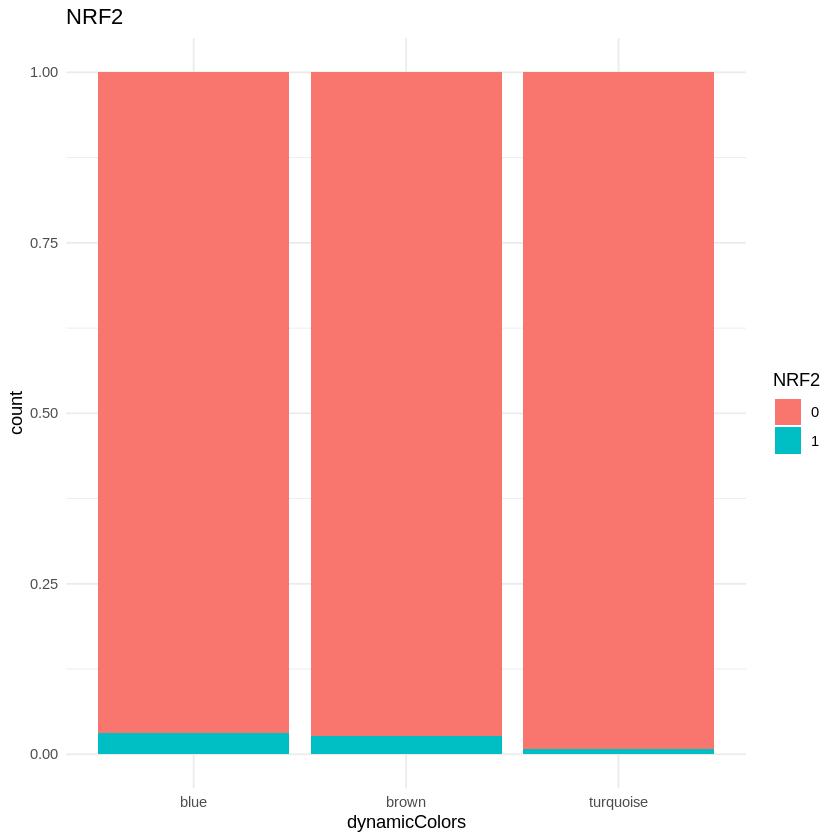

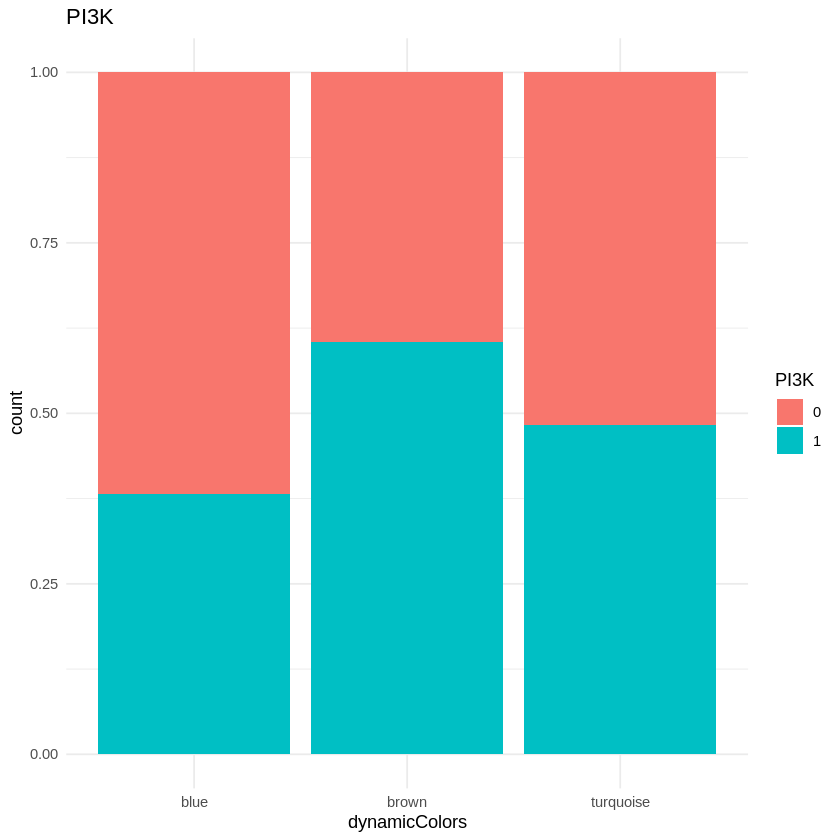

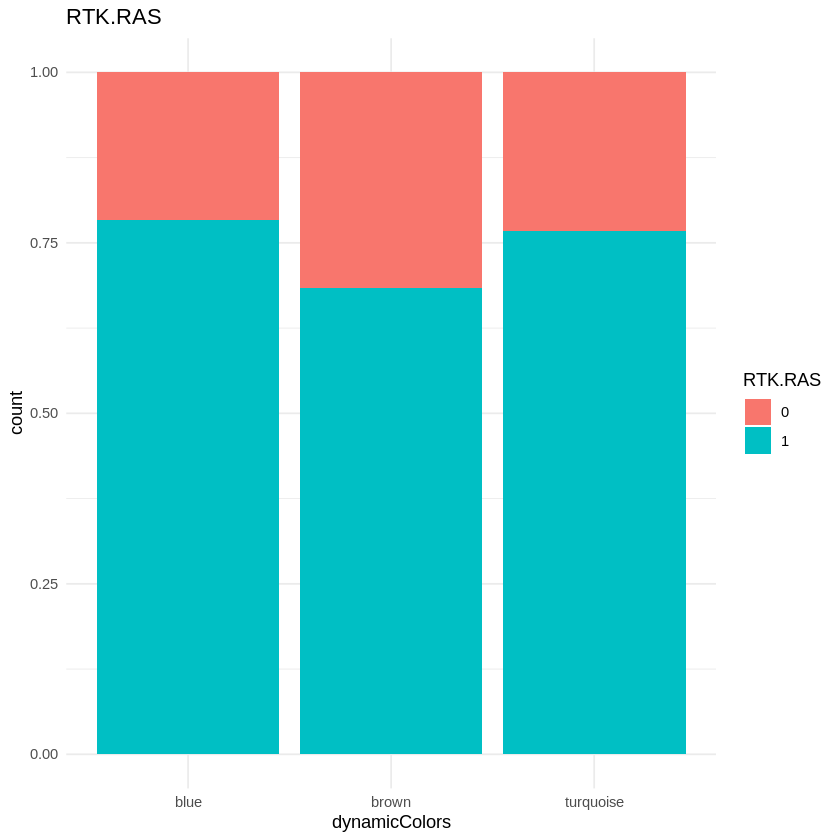

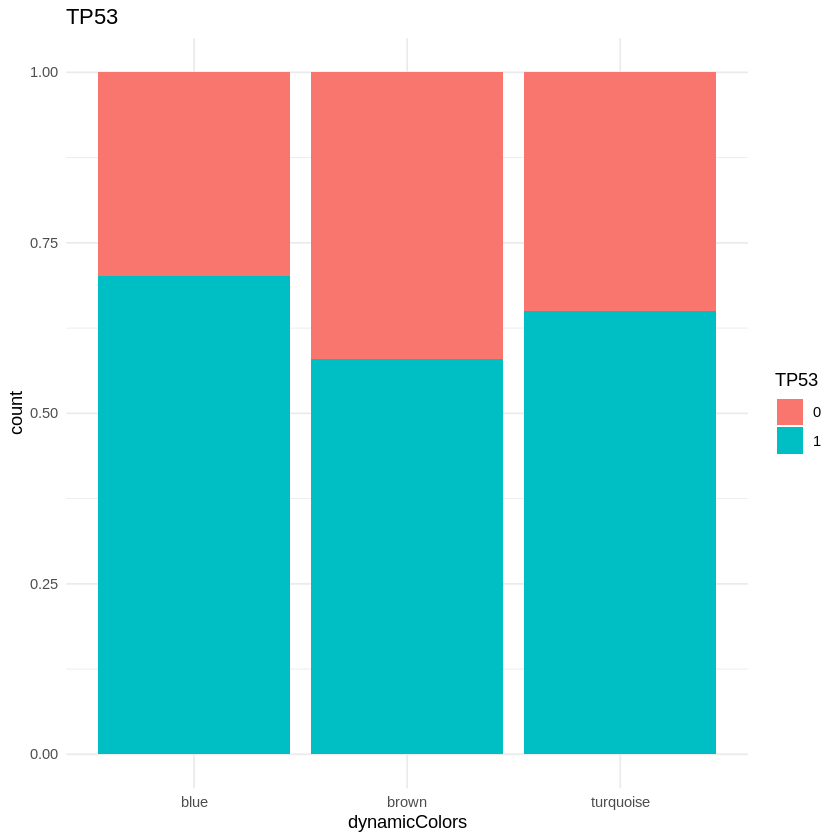

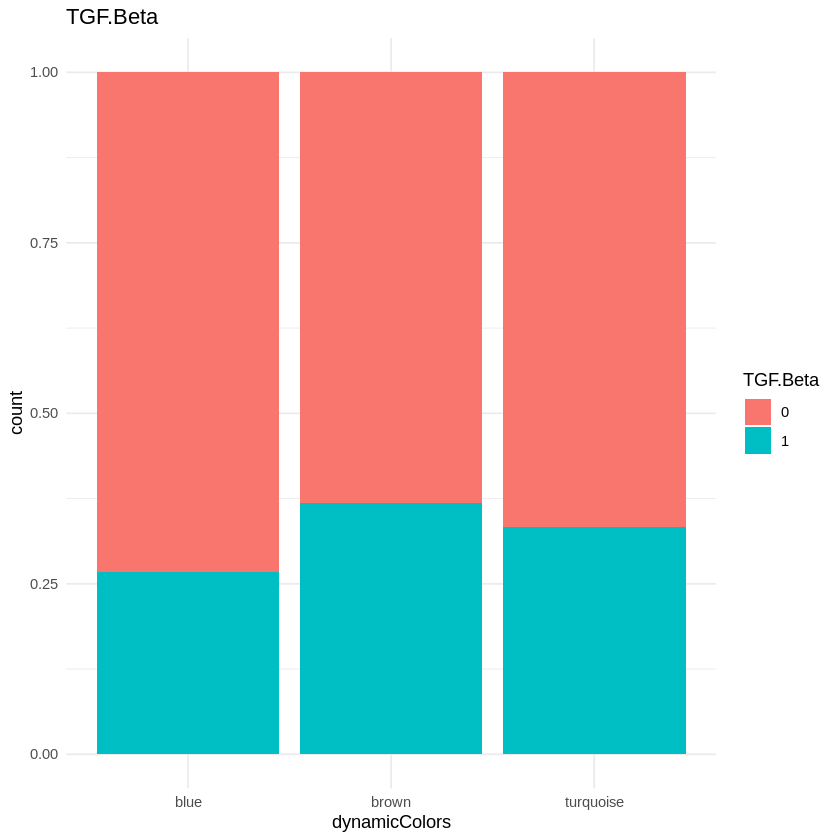

In [2]:
library(ggplot2)
for(i in colnames(Plot.df.Alt.pathway)[5:13]){
  # i = "Cell.Cycle"
  Plot.df.sub <- Plot.df.Alt.pathway[,c("dynamicColors",i)]
    # Remove NA value
  data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
  data[,i] <- as.factor(data[,i])
    p <- ggplot(data, aes(x = dynamicColors, fill = data[,i])) + 
      geom_bar(position = "fill") + theme_minimal()+ scale_fill_discrete(name =i)+
      labs(title =i)
    print(p)
}
